Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Viktor Penchev"
STUDENTID = "230966576"

---

MTH765P - Coursework 4 
This is a template notebook for the last coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Failure to comply
may result in unexpected errors that can lead to mark deductions.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [2]:
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1 (20 points): 

-----------------------------------------


a.)  **(12 points)** Create a sqlite database called **nanoim.db** with the following tables.
- All numbers should be integers
- IDs should be the primary key
- All other entries should be of type TEXT

Be sure to close the table once you have created it. 

<h1><center>Movies</center></h1>

|MovieID  | Movie |Actor |Director|
|  :--:|  :----: |  :----:| :----:|
|1 | Idiocracy| 1 |4|
|2 | Predator |2 |1|
|3 | Unbearable Weight of Massive Talent |4  |2|
|4 | Point Break  |3 | 3 |


<h1><center>Actors</center></h1>

|ActorID  | Name | Rank|
|  :--:|  :----: |  :----:|
|1 |Terry Crews|3|
|2 | Arnold Schwarzenegger |2|
|3 |Keanu Reeves | 1 |
|4 |Nicholas Cage |4|


<h1><center>Directors </center></h1>

|DirectorID  | Name |
|  :--:|  :----: | 
|1 |John McTiernan| 
|2 |Tom Gormican|
|3 |Kathryn Bigelow |
|4 |Mike Judge|





In [37]:
conn = sqlite3.connect('nanoim.db')

In [3]:
# YOUR CODE HERE
cursorObject = conn.cursor()
# create the table module 
# with the columns: module_code, module_code, and lecturer

cursorObject.execute('''CREATE TABLE 
                        Movies(MovieID integer PRIMARY KEY, 
                        Movie text, Actor integer, Director integer)''')
cursorObject.execute('''CREATE TABLE
                        Actors(ActorID integer PRIMARY KEY,
                        Name text, Rank integer)''')
cursorObject.execute('''CREATE TABLE
                        Directors(DirectorID integer PRIMARY KEY,
                        Name text)''')

conn.commit()

cursorObject.execute('''INSERT INTO Movies(MovieID, Movie, Actor, Director)
                        VALUES(1, "Idiocracy", 1, 4)''')
cursorObject.execute('''INSERT INTO Movies(MovieID, Movie, Actor, Director)
                        VALUES(2, "Predator", 2, 1)''')
cursorObject.execute('''INSERT INTO Movies(MovieID, Movie, Actor, Director)
                        VALUES(3, "Unbearable Weight of Massive Talent", 4, 2)''')
cursorObject.execute('''INSERT INTO Movies(MovieID, Movie, Actor, Director)
                        VALUES(4, "Point Break", 3, 3)''')

cursorObject.execute('''INSERT INTO Actors(ActorID, Name, Rank)
                        VALUES(1, "Terry Crews", 3)''')
cursorObject.execute('''INSERT INTO Actors(ActorID, Name, Rank)
                        VALUES(2, "Arnold Schwarzenegger", 2)''')
cursorObject.execute('''INSERT INTO Actors(ActorID, Name, Rank)
                        VALUES(3, "Keanu Reeves", 1)''')
cursorObject.execute('''INSERT INTO Actors(ActorID, Name, Rank)
                        VALUES(4, "Nicolas Cage", 4)''')

cursorObject.execute('''INSERT INTO Directors(DirectorID, Name)
                        VALUES(1, "John McTiernan")''')
cursorObject.execute('''INSERT INTO Directors(DirectorID, Name)
                        VALUES(2, "Tom Gormican")''')
cursorObject.execute('''INSERT INTO Directors(DirectorID, Name)
                        VALUES(3, "Kathryn Bigelow")''')
cursorObject.execute('''INSERT INTO Directors(DirectorID, Name)
                        VALUES(4, "Mike Judge")''')

conn.commit()
conn.close()

----------------
----------------

b.) **(2 points)** Reconnect with **nanoim.db** in a connection named _conn_

----------------

In [38]:
# YOUR CODE HERE
conn = sqlite3.connect('nanoim.db')

For the rest of this question you will construct SQL queries and run them.
- Make sure to store the result in the variable name given
- Make queries so that they would work if the tables are expanded or updated. 
- Use only sqlite3 functions 

---------
---------

c.) **(3 points)** Create the following query to return names of the actors who are ranked 3rd or higher (**The highest rank is 1**). Store the result in a variable called _actors_

---------

In [39]:
# YOUR CODE HERE
cursorObject = conn.cursor()
cursorObject.execute('''SELECT Name FROM Actors WHERE Rank <= 3''')
actors = cursorObject.fetchall()
cursorObject.close()
actors

[('Terry Crews',), ('Arnold Schwarzenegger',), ('Keanu Reeves',)]

---------
---------

d.) **(2 points)** Create a following query to return the name of movies starring Keanu Reeves. Store the result in a variable called _keanu_

---------

In [40]:
# YOUR CODE HERE
#  Create a following query to return the name of movies starring Keanu Reeves. Store the result in a variable called _keanu_
cursorObject = conn.cursor()
cursorObject.execute('''SELECT Movie FROM Movies WHERE Actor = 3''')
keanu = cursorObject.fetchall()[0][0]
cursorObject.close()
keanu

'Point Break'

----------
----------
e.) **(1 point)** Close the connection.

----------

In [41]:
# YOUR CODE HERE
conn.close()

## Question 2 (30 Points)
------------

We will connect to the database given in the file **music.db**. This database has quite a large
number of tables. We will deal with the following tables which have the following
columns.
- album: album id, title, artist id
- artist: artist id, name
- genre: genre id, name
- track: track id, name, album id, media type id, genre id, composer, milliseconds, bytes, unit price

In [31]:
m_conn = sqlite3.connect('music.db')

--------------
--------------
a.) **(5 points)** Construct a query which lists the  albums  Iron Maiden have in the database and put it into variable called _maiden_

--------------

In [32]:
# YOUR CODE HERE
cursorObject = m_conn.cursor()
cursorObject.execute('''SELECT title FROM  album 
                     INNER JOIN artist ON album.artist_id = artist.artist_id
                     WHERE artist.name = "Iron Maiden"''')
maiden = cursorObject.fetchall()
cursorObject.close()
maiden

[('A Matter of Life and Death',),
 ('A Real Dead One',),
 ('A Real Live One',),
 ('Brave New World',),
 ('Dance Of Death',),
 ('Fear Of The Dark',),
 ('Iron Maiden',),
 ('Killers',),
 ('Live After Death',),
 ('Live At Donington 1992 (Disc 1)',),
 ('Live At Donington 1992 (Disc 2)',),
 ('No Prayer For The Dying',),
 ('Piece Of Mind',),
 ('Powerslave',),
 ('Rock In Rio [cd1]',),
 ('Rock In Rio [cd2]',),
 ('Seventh Son of a Seventh Son',),
 ('Somewhere in Time',),
 ('The Number of The Beast',),
 ('The X Factor',),
 ('Virtual XI',)]

--------------
--------------
b.) **(5 points)** Construct a query which lists all the tracks on the album Californication and store the result in a variable called _rhcp_

--------------

In [33]:
# YOUR CODE HERE
cursorObject = m_conn.cursor()
cursorObject.execute('''SELECT name FROM track
                        INNER JOIN album ON track.album_id = album.album_id
                        WHERE album.title = "Californication"''')
rhcp = cursorObject.fetchall()
cursorObject.close()
rhcp

[('Around The World',),
 ('Parallel Universe',),
 ('Scar Tissue',),
 ('Otherside',),
 ('Get On Top',),
 ('Californication',),
 ('Easily',),
 ('Porcelain',),
 ('Emit Remmus',),
 ('I Like Dirt',),
 ('This Velvet Glove',),
 ('Savior',),
 ('Purple Stain',),
 ('Right On Time',),
 ("Road Trippin'",)]

--------------
--------------

c.) **(10 points)** Construct a query which returns how much it would cost to buy all Deep Purple songs to the nearest pound and store it in a variable called _rockon_
- You should assume the track costs are in pounds

---------------

In [34]:
# YOUR CODE HERE
cursorObject = m_conn.cursor()
cursorObject.execute('''SELECT ROUND(SUM(unit_price)) FROM track
                        INNER JOIN album ON track.album_id = album.album_id
                        WHERE album.artist_id IN (SELECT artist_id FROM artist WHERE name = "Deep Purple")''')
rockon = cursorObject.fetchall()[0][0]
cursorObject.close()
rockon

91.0

--------------
--------------

d.) **(10 points)** Construct a query which returns the name and the length of the longest Metal song and transforms it in seconds (to the nearest second) and stores the name in a variable called _longsong_ and the length in a variable called _time_

---------------


In [12]:
# YOUR CODE HERE
cursorObject = m_conn.cursor()
cursorObject.execute('''SELECT track.name, ROUND(MAX(milliseconds)/1000) FROM track
                        INNER JOIN genre ON track.genre_id = genre.genre_id
                        WHERE genre.name = "Metal"''')
longsong, time = cursorObject.fetchall()[0]
cursorObject.close()
longsong, time

('Rime of the Ancient Mariner', 816.0)

In [13]:
m_conn.close()

## Question 3 (30 Points)
------------


We will connect to the database given in the file **football.db**. This database has players and some of their statistics in 2 tables:
- 'Players'
- 'Player_Attributes'

The tables are linked via **player_api_id**

Unless otherwise stated you must only use SQL queries to get full marks. Below are the tables:

**'Players'**
<img src="1.png" alt="Drawing" style="width: 250px;"/>

**'Player Attributes'**
![title](3.png)




-----------
-----------

a.) **(5 points)** How many goalkeepers are in the database. Store the number (and only the number as an integer) in a variable called _keeper_.

------------


In [44]:
conn = sqlite3.connect('football.db')

In [45]:
# Let's investigate how we can find which players are goalkeepers.
# I will look at the stats of Messi and Neuer, and see if there is a significant difference.
cursorObject = conn.cursor()
cursorObject.execute('''SELECT * FROM player INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id WHERE player_name="Manuel Neuer"''')
neuer = cursorObject.fetchall()[-1]
cursorObject.execute('''SELECT * FROM player INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id WHERE player_name="Lionel Messi"''')
messi = cursorObject.fetchall()[-1]
cursorObject.close()
print(neuer)
print(messi)

(6556, 27299, 'Manuel Neuer', 167495, '1986-03-27 00:00:00', 193.04, 203, 109062, 167495, 27299, '2007-02-22 00:00:00', 64, 76, 'right', 'medium', 'medium', 9, 8, 11, 28, 7, 9, 13, 45, 47, 24, 57, 58, 53, 69, 67, 26, 83, 52, 76, 12, 26, 50, 39, 33, 45, 15, 26, 9, 64, 60, 47, 57, 69)
(6176, 30981, 'Lionel Messi', 158023, '1987-06-24 00:00:00', 170.18, 159, 102508, 158023, 30981, '2007-02-22 00:00:00', 85, 94, 'left', 'high', 'medium', 85, 76, 59, 86, 88, 95, 87, 87, 79, 92, 92, 94, 96, 85, 86, 83, 64, 74, 55, 84, 62, 75, 89, 91, 87, 20, 25, 20, 8, 9, 79, 12, 16)


It seems that we can't easily seperate the goalkeepers from the other players. For the games presented, there are values recorded for each attribute for Neuer, even though he is a goalkeeper and some of the attributes don't seem to be relevant for goalkeepers. On top of that, Messi's stat for 'gk_kicking' is almost twice that of Neuer's, which again doesn't make sense. We need to dig deeper to find out how to seperate the goalkeepers from the other players. Next, I will gather all the data into a dataframe for easy plotting and analysis.

In [46]:
cursorObject = conn.cursor()

# Get column names
cursorObject.execute('''PRAGMA table_info(player_attributes);
''')
attributes_columns = cursorObject.fetchall()
cursorObject.execute('''PRAGMA table_info(player);
''')
player_columns = cursorObject.fetchall()

attributes_columns = [column[1] for column in attributes_columns]
player_columns = [column[1] for column in player_columns]

# Convert the tables into dataframe
cursorObject.execute('''SELECT * FROM player INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id''')
players = cursorObject.fetchall()
cursorObject.close()
players = pd.DataFrame(players, columns = player_columns + attributes_columns)
players = players.dropna()
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Let's now plot the histograms of the goalkeeper attributes.

Text(0.5, 1.0, 'GK Reflexes')

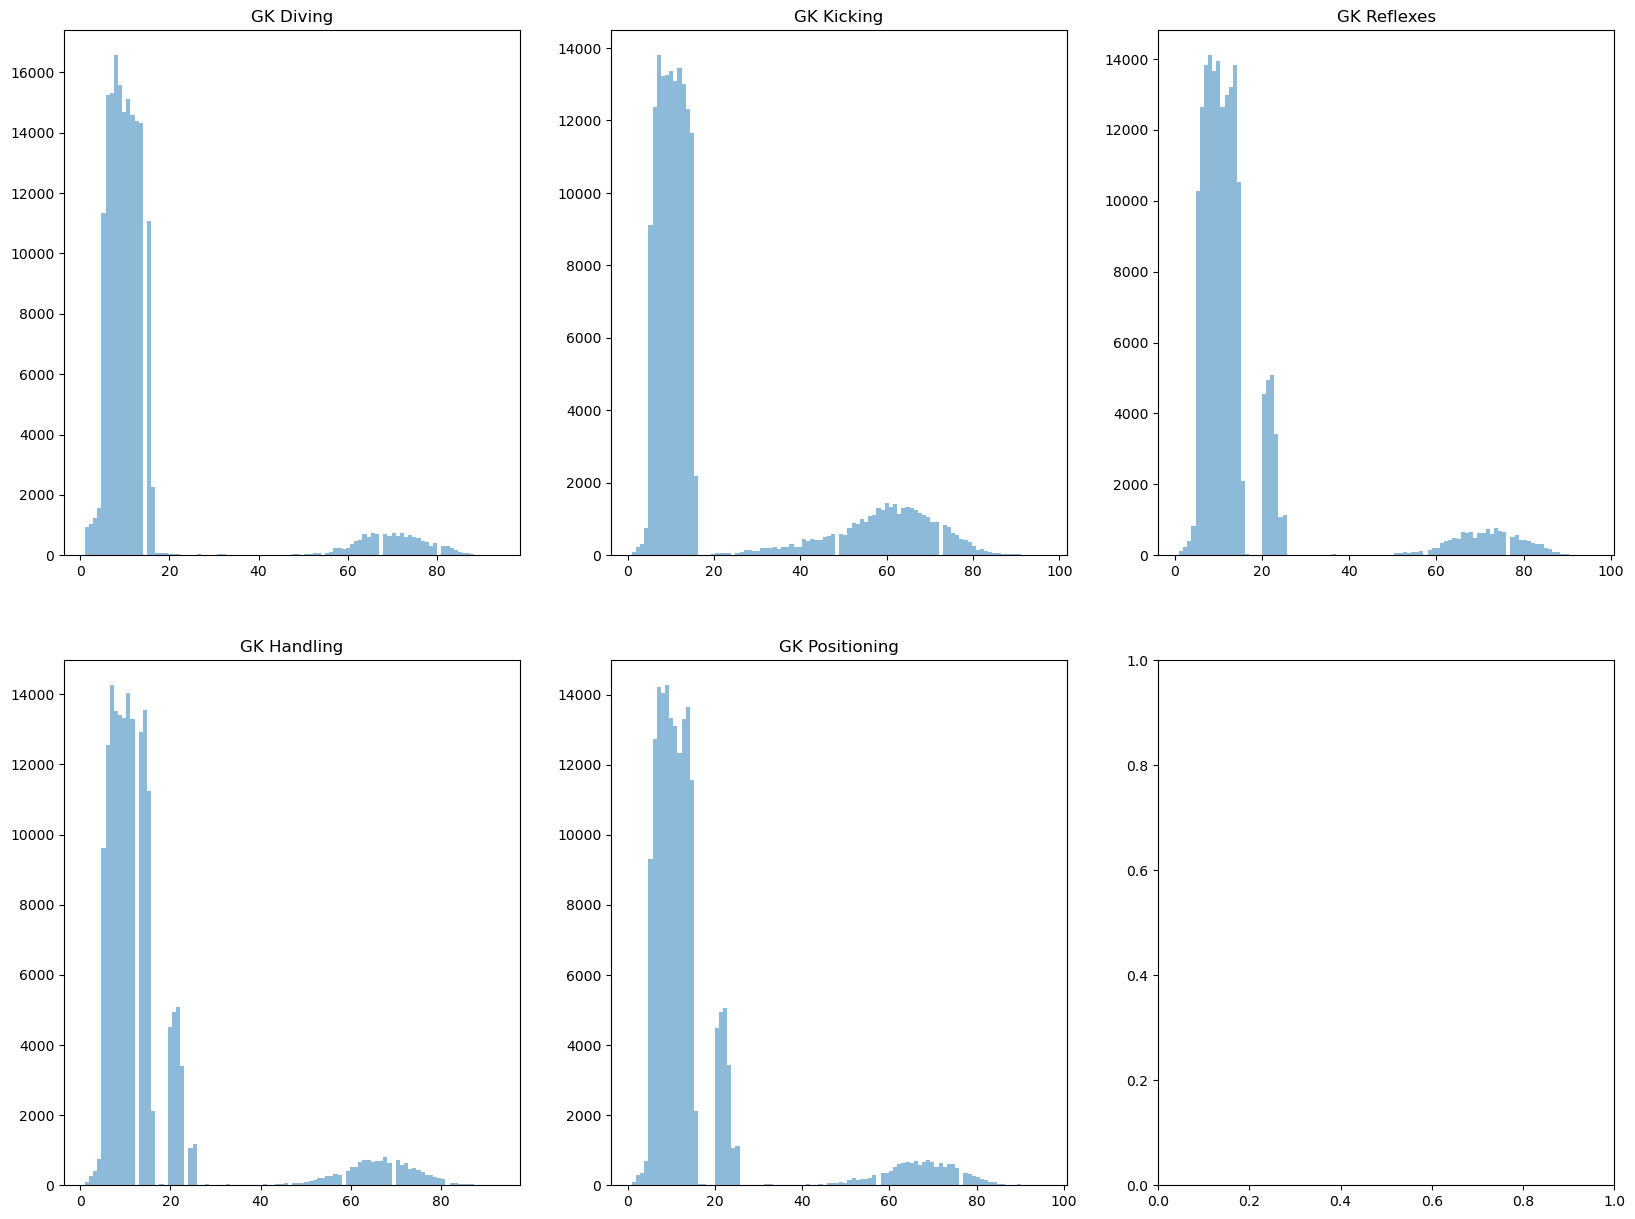

In [47]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))

ax[0, 0].hist(players['gk_diving'], bins=100, alpha=0.5);
ax[0,0].set_title('GK Diving')
ax[1, 0].hist(players['gk_handling'], bins=100, alpha=0.5);
ax[1,0].set_title('GK Handling')
ax[0, 1].hist(players['gk_kicking'], bins=100, alpha=0.5);
ax[0,1].set_title('GK Kicking')
ax[1, 1].hist(players['gk_positioning'], bins=100, alpha=0.5);
ax[1,1].set_title('GK Positioning')
ax[0, 2].hist(players['gk_reflexes'], bins=100, alpha=0.5);
ax[0,2].set_title('GK Reflexes')

In all of the plots there are a lot of values between 0 and 25 and then bell curves around 60-80. We can try using values which fall only in the bell curves to seperate the goalkeepers from the other players. By looking at the plots we can assume some cutoff values which we can use to seperate the goalkeepers from the other players. It is possible we miss some goalkeepers by using this strategy, however, given that we observe multiple games for each player, I hope that each goalkeeper will surpass these thresholds in at least one game. We will use the following cutoff values:
* gk_diving: 40
* gk_handling: 20
* gk_kicking: 40
* gk_positioning: 40
* gk_reflexes: 40

Now let's make an SQL query to find out how many goalkeepers there are in the database. 

In [48]:
cursorObject = conn.cursor()
cursorObject.execute('''SELECT DISTINCT player_name from player 
                        INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id 
                        WHERE gk_diving > 40 AND gk_handling > 20 AND gk_kicking > 40 AND gk_positioning > 40 AND gk_reflexes > 40''')
gk = cursorObject.fetchall()
cursorObject.close()
keeper = len(gk)
print(f"First 10 goalkeepers: {gk[:10]}")
print(f"Number of keepers: {keeper}")

First 10 goalkeepers: [('Abdoulaye Diallo',), ('Achille Coser',), ('Adam Bogdan',), ('Adam Collin',), ('Adam Federici',), ('Adrian',), ('Adriano Facchini',), ('Alan Combe',), ('Alan Mannus',), ('Alan Martin',)]
Number of keepers: 951


A quick google of some of the names confirms we might be correct as all of the first 10 players are goalkeepers. 


-----------
-----------

b.)  **(10 points )** Find the player with the maximum ability for **marking**. Return the score the player has have for marking, the name, and the players height in meters. Store the three values (in this order) in a tuple called _mk_.

------------


In [29]:
# YOUR CODE HERE
cursorObject = conn.cursor()
cursorObject.execute('''SELECT max(player_attributes.marking), player.player_name, player.height/100 FROM player_attributes
                        INNER JOIN player ON player_attributes.player_api_id = player.player_api_id''')
mk = cursorObject.fetchall()
cursorObject.close()
mk = mk[0]
mk

(96, 'Fabio Cannavaro', 1.7526)


-----------
-----------

c.)  **(15 points )** Here you will use matplotlib. Create 2 plots in 1 row where:
 - the first is a scatter plot of weight and dribbling (use a point size of 2)
 - the second is a histogram with 25 bins on the height of goalkeepers (use a transparency of 0.3)

**Note:** To get full marks you should not use any filtering after the SQL query but you may use multiple queries and you may chnage the format of the output.

------------


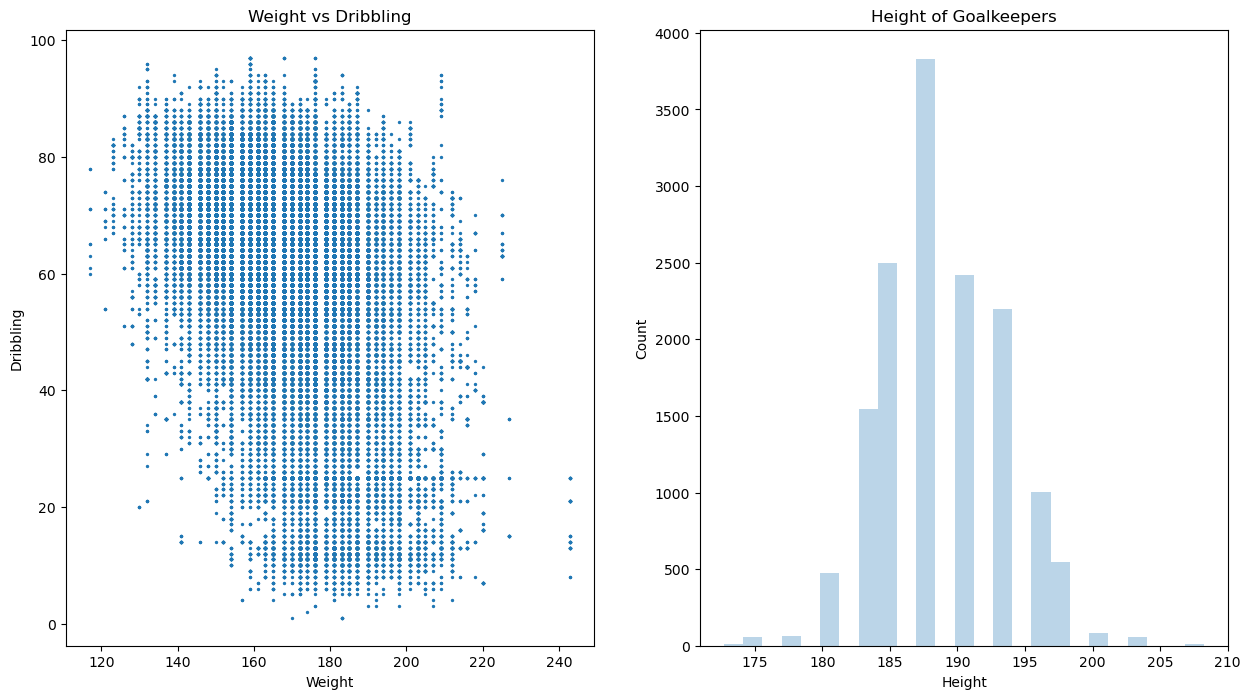

In [19]:
# YOUR CODE HERE
cursorObject = conn.cursor()
cursorObject.execute('''SELECT weight, dribbling FROM player INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id''')
wh = np.array(cursorObject.fetchall())
cursorObject.execute('''SELECT height FROM player
                        INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id 
                        WHERE gk_diving > 40 AND gk_handling > 20 AND gk_kicking > 40 AND gk_positioning > 40 AND gk_reflexes > 40''')
gk_height = np.array(cursorObject.fetchall())
cursorObject.close()

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].scatter(wh[:, 0], wh[:, 1], s=2);
ax[0].set_title('Weight vs Dribbling')
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('Dribbling')
ax[1].hist(gk_height, bins=25, alpha=0.3);
ax[1].set_title('Height of Goalkeepers')
ax[1].set_xlabel('Height')
ax[1].set_ylabel('Count');

In [43]:
conn.close()